In [18]:
import numpy as np 
import pandas as pd 

import os

df = pd.read_csv('CarsSet/number_of_samples.csv')
df


,Unnamed: 0,Number of samples for training,Number of samples for testing
0,0,269,57


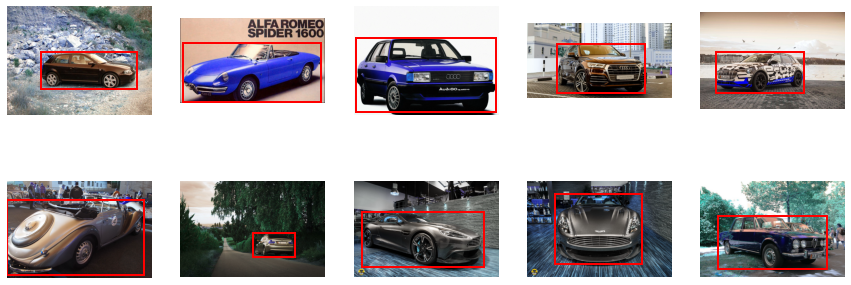

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import xml.etree.ElementTree as ET

images = []
bnbox = []
data = os.listdir('CarsSet/DATA/DATA/train')


for image in data:
    if(image.endswith('.jpg')):
        images.append(image)
    else:
        # Load the XML annotation file
        tree = ET.parse('CarsSet/DATA/DATA/train/' + image)
        root = tree.getroot()
        bndbox = root.find('.//bndbox')
        bbox = []

        # Extract the xmin, ymin, xmax, and ymax values from the bndbox element
        bbox.append(int(bndbox.find('xmin').text))
        bbox.append(int(bndbox.find('ymin').text))
        bbox.append(int(bndbox.find('xmax').text))
        bbox.append(int(bndbox.find('ymax').text))

        bnbox.append(bbox)

plt.figure(figsize=(15,15))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    image = cv2.imread('CarsSet/DATA/DATA/train/'+str(images[i]))  
    ax.imshow(image)
    rect = patches.Rectangle((bnbox[i][0],bnbox[i][1]), bnbox[i][2]-bnbox[i][0], bnbox[i][3]-bnbox[i][1], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.title('')
    plt.axis("off")

plt.show()



